In [88]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
print("setup complete")

setup complete


In [89]:
def fetchdata():
    df=pd.DataFrame()
    for season in os.scandir('D:\\Pranav\\Code\\IEEE\\nba-prediction-repo\\datasets\\combined'):
        if season.is_dir():
            for month in os.scandir('D:\\Pranav\\Code\\IEEE\\nba-prediction-repo\\datasets\\combined\\'+season.name):
                temp=pd.read_csv('D:\\Pranav\\Code\\IEEE\\nba-prediction-repo\\datasets\\combined\\'+season.name+'\\'+month.name)
                df=df.append(temp,ignore_index=True)
    df.drop(['Team1','Team2','Team1Score','Team2Score'],axis=1,inplace=True)
    return df  

In [90]:
def sigmoid(Z):
    sig=1/(1+np.exp(-Z))
    sig=np.maximum(sig,0.0001)
    sig=np.minimum(sig,0.9999)
    return sig

In [91]:
def initialize(dim):
    w=np.zeros((dim,1))
    b=0
    return w,b

In [92]:
def propagate(w,b,X,Y):
    m=X.shape[1]
    Z=np.dot(w.T,X)+b
    A=sigmoid(Z)
    dZ=A-Y
    db=np.sum(dZ)/m
    dw=np.dot(X,dZ.T)/m 
    cost=-np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m
    grads={'dw':dw,'db':db}
    return grads,cost
    

In [93]:
def gd(w,b,X,Y,learning_rate,num_iterations):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propagate(w,b,X,Y)
        dw=grads['dw']
        db=grads['db']
        w-=learning_rate*dw
        b-=learning_rate*db
        if i%50==0 : costs.append(cost)
    params={'w':w,'b':b}
    return params,costs 

In [94]:
def predict(w,b,X):
    m=X.shape[1]
    Y=np.zeros((1,m))
    Z=np.dot(w.T,X)+b
    A=sigmoid(Z)
    Y= A>0.5
    return Y

In [95]:
def model(X_train,Y_train,X_test,Y_test,learning_rate,num_iterations):
    nx=X_train.shape[0]
    w,b=initialize(nx)
    params,costs=gd(w,b,X_train,Y_train,learning_rate,num_iterations)
    w=params['w']
    b=params['b']
    Y_predict=predict(w,b,X_test)
    testaccuracy=100-np.mean(np.abs(Y_predict-Y_test))*100
    d={'w':w,'b':b,'test accuracy':testaccuracy,'costs':costs}
    return d

In [96]:
data=fetchdata()
X=np.asarray(data.drop(['Team1Win'],axis=1))
Y=np.asarray(data['Team1Win'])
X=preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=42)
X_train=X_train.T
X_test=X_test.T
Y_train=Y_train.reshape((1,Y_train.shape[0]))
Y_test=Y_test.reshape((1,Y_test.shape[0]))

In [97]:
learning_rate=0.003
num_iterations=5000
d=model(X_train,Y_train,X_test,Y_test,learning_rate,num_iterations)

In [98]:
w=d['w']
b=d['b']
testaccuracy=d['test accuracy']
costs=d['costs']
print("Coefficients :",w,sep='\n')
print("Intercept :",b)
print("Last recorded cost :",costs[-1]) 
print("Test accuracy :",testaccuracy) 

Coefficients :
[[ 0.10061854]
 [-0.20365554]
 [ 0.23779711]
 [-0.01819099]
 [ 0.02482149]
 [-0.02120265]
 [-0.03126635]
 [-0.01747765]
 [ 0.03940777]
 [-0.05138191]
 [ 0.08233942]
 [ 0.1060222 ]
 [-0.03933296]
 [ 0.2368944 ]
 [-0.12118036]
 [ 0.23618355]
 [-0.27880625]
 [ 0.03551629]
 [-0.02919719]
 [-0.01117216]
 [ 0.0011727 ]
 [-0.00454895]
 [-0.05330031]
 [ 0.05898623]
 [-0.09329944]
 [-0.10521236]
 [ 0.05670986]
 [-0.26415912]]
Intercept : -0.4568500939903419
Last recorded cost : 0.5396379698398115
Test accuracy : 71.01180828895578


Text(0.5, 1.0, 'learning rate = 0.003')

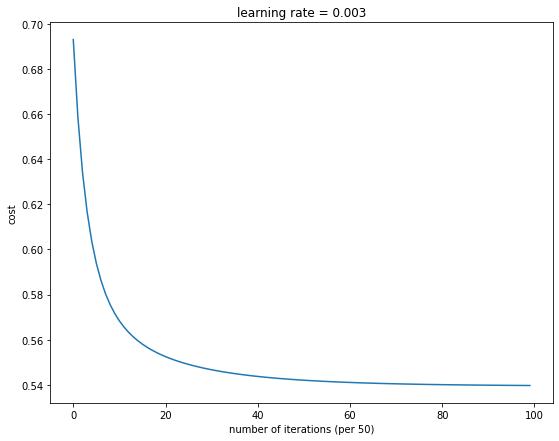

In [99]:
plt.figure(figsize=(9,7))
plt.plot(costs)
plt.xlabel('number of iterations (per 50)')
plt.ylabel('cost')
plt.title('learning rate = '+str(learning_rate))